# Phase 2 Milestone 1

## Perkenalan

Nama : Raden Mas Xyla Ramadhan

Batch 13

Link Backend 
- https://tf-serving-xyla-backend.herokuapp.com/v1/models/churn_model

Link Frontend 
- https://tf-serving-xyla-frontend.herokuapp.com/

### Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu membuat model improvement terhadap model yang dibuat
- Mampu menganalsis model improvement

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import math
from tensorflow import keras
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Model, Sequential


import pickle

## Data Loading



In [2]:
# Membuat dataset dari file 'h8dsft_Milestone1P2_dataset_xyla_ramadhan.csv'
data = pd.read_csv('h8dsft_Milestone1P2_dataset_xyla_ramadhan.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Characteristics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight yang didapat adalah terdapat 21 kolom dan 7043 baris

Tipe Kolom dalam dataset: float64(1), int64(2), object(18)

namun ada data yang kurang tepat yang perlu di ubah seperti
- SeniorCitizen berbentuk int64 akan diubah ke 'object' karena berbentuk categorical
- TotalCharges berbentuk object akan diubah ke bentuk 'float64'


In [5]:
data.TotalCharges = data.TotalCharges.replace(' ', np.nan) # replace empty space with NaN
data.TotalCharges = data.TotalCharges.astype(float) # convert to float

In [6]:
data.SeniorCitizen = data.SeniorCitizen.map({1: 'Yes', 0: 'No'}) # convert to string

### Missing Value

In [7]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

cek apakah Missing value perlu di drop atau bisa pakai simple imputer

In [8]:
data[data.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


setelah dilihat dari dataset karena data yang dipakai tidak spesifik berapa jumlah harga yang dipatok per layanan maka saya tidak bisa mengkalkulasikannya secara manual, dan missing value hanya (11/7043) 0,15 % dari seluruh jumlah data yang artinya tidak terlalu signifikan, oleh karena itu saya akan drop column missing value. 

In [9]:
data.dropna(inplace = True)

### Duplicated Data

In [10]:
data.duplicated().sum()

0

tidak ada duplikasi data

### Data Info

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Insight yang didapat adalah terdapat 21 kolom dan 7032 baris setelah data cleaning

Tipe Kolom dalam dataset: float64(2), int64(1), object(18) setelah data manipulation

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Insight yang didapat adalah 
- minimal montly charge adalah 18.25 dan min Total Charge adalah 18.80
- maximal montly charge adalah 118 dan min Total Charge adalah 8684.80


## Exploratory Data Analysis (EDA)

dari data.info() kita dapat memisahkan menjadi beberapa kategori 
- Output Variable : Churn
- Demographic Information: gender,SeniorCitizen,Partner,Dependents
- Service Information: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
- Account Information: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

### Churn

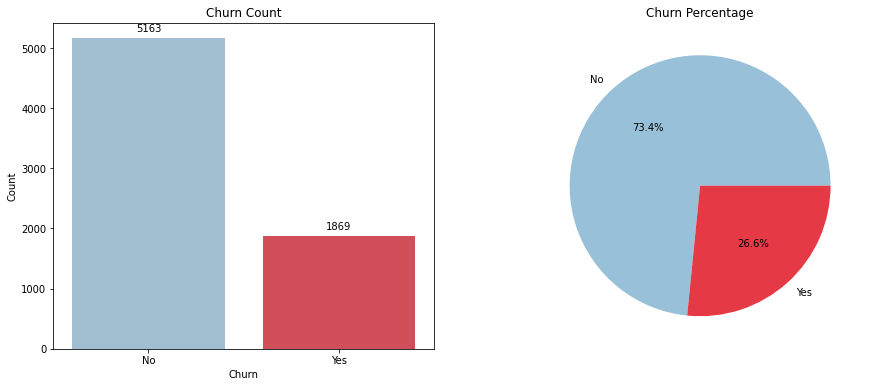

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='Churn', data=data,palette=['#98C1D9','#E63946'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.Churn.value_counts(), labels=data.Churn.value_counts().index, autopct='%1.1f%%',colors =["#98C1D9","#E63946"])
plt.title('Churn Percentage')
plt.show()

Insight yang didapat adalah 73,4% atau 5163 customer tidak churn dan 26,6 persen dari total customer adalah churn (meninggalkan perusahaan)

saya sebagai data analis akan menganalisis apa saja faktor yang membuat customer meninggalkan perusahaan atau Churn dimulai dari demographic information

### Demographic Information

gender,SeniorCitizen,Partner,Dependents

Text(0, 0.5, 'Count')

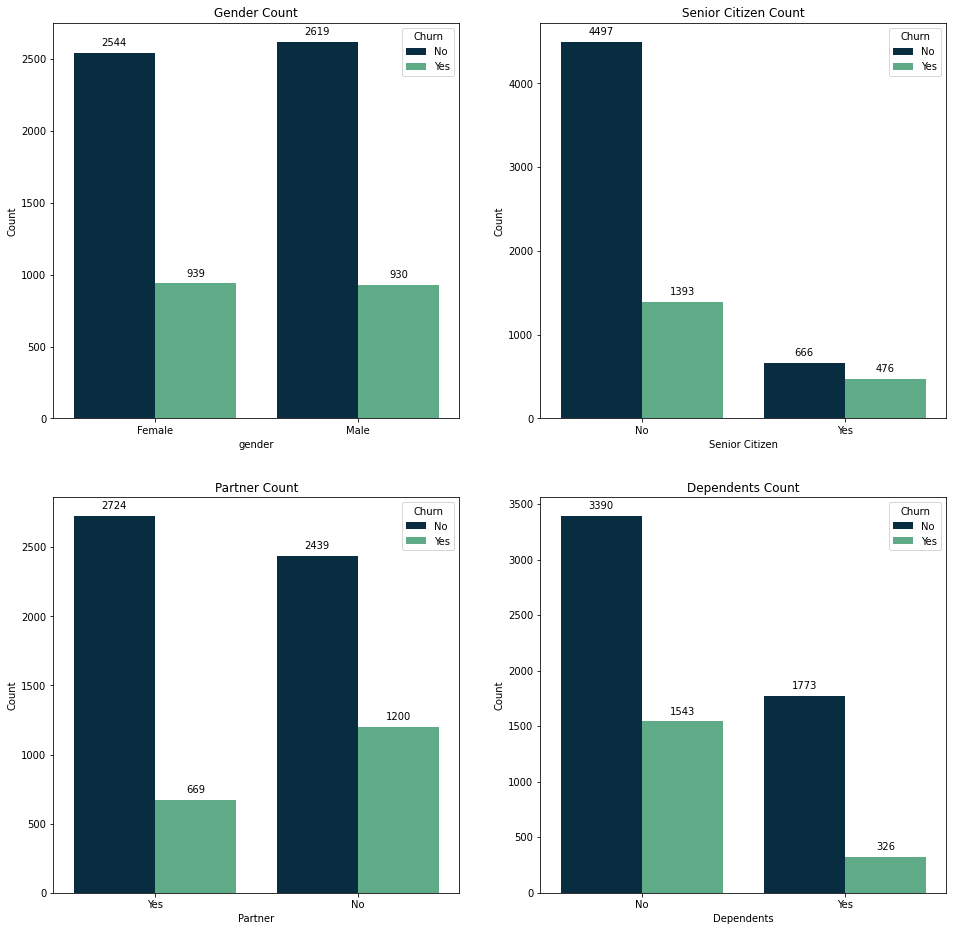

In [14]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
fig = sns.countplot(x='gender', data=data, hue='Churn',palette=['#003049','#52B788'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Gender Count')
plt.xlabel('gender')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
fig = sns.countplot(x='SeniorCitizen', data=data, hue='Churn', palette=['#003049','#52B788'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Senior Citizen Count')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
fig = sns.countplot(x='Partner', data=data, hue='Churn', palette=['#003049','#52B788'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Partner Count')
plt.xlabel('Partner')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
fig = sns.countplot(x='Dependents', data=data, hue='Churn',palette=['#003049','#52B788'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Dependents Count')
plt.xlabel('Dependents')
plt.ylabel('Count')


Insight yang di dapat adalah 
- presentase churn antara laki dan perempuan sama 
- senior citizen memiliki presentase churn rate yang tinggi dapat dikatakan bahwa senior citizen cenderun churn
- customer yang tidak memiliki partner memiliki partner memliki presentase chrun yang lebih besar daripada yang memiliki partner
- customer yang memiliki dependets cenderung tidak churn 

### Service Information

PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

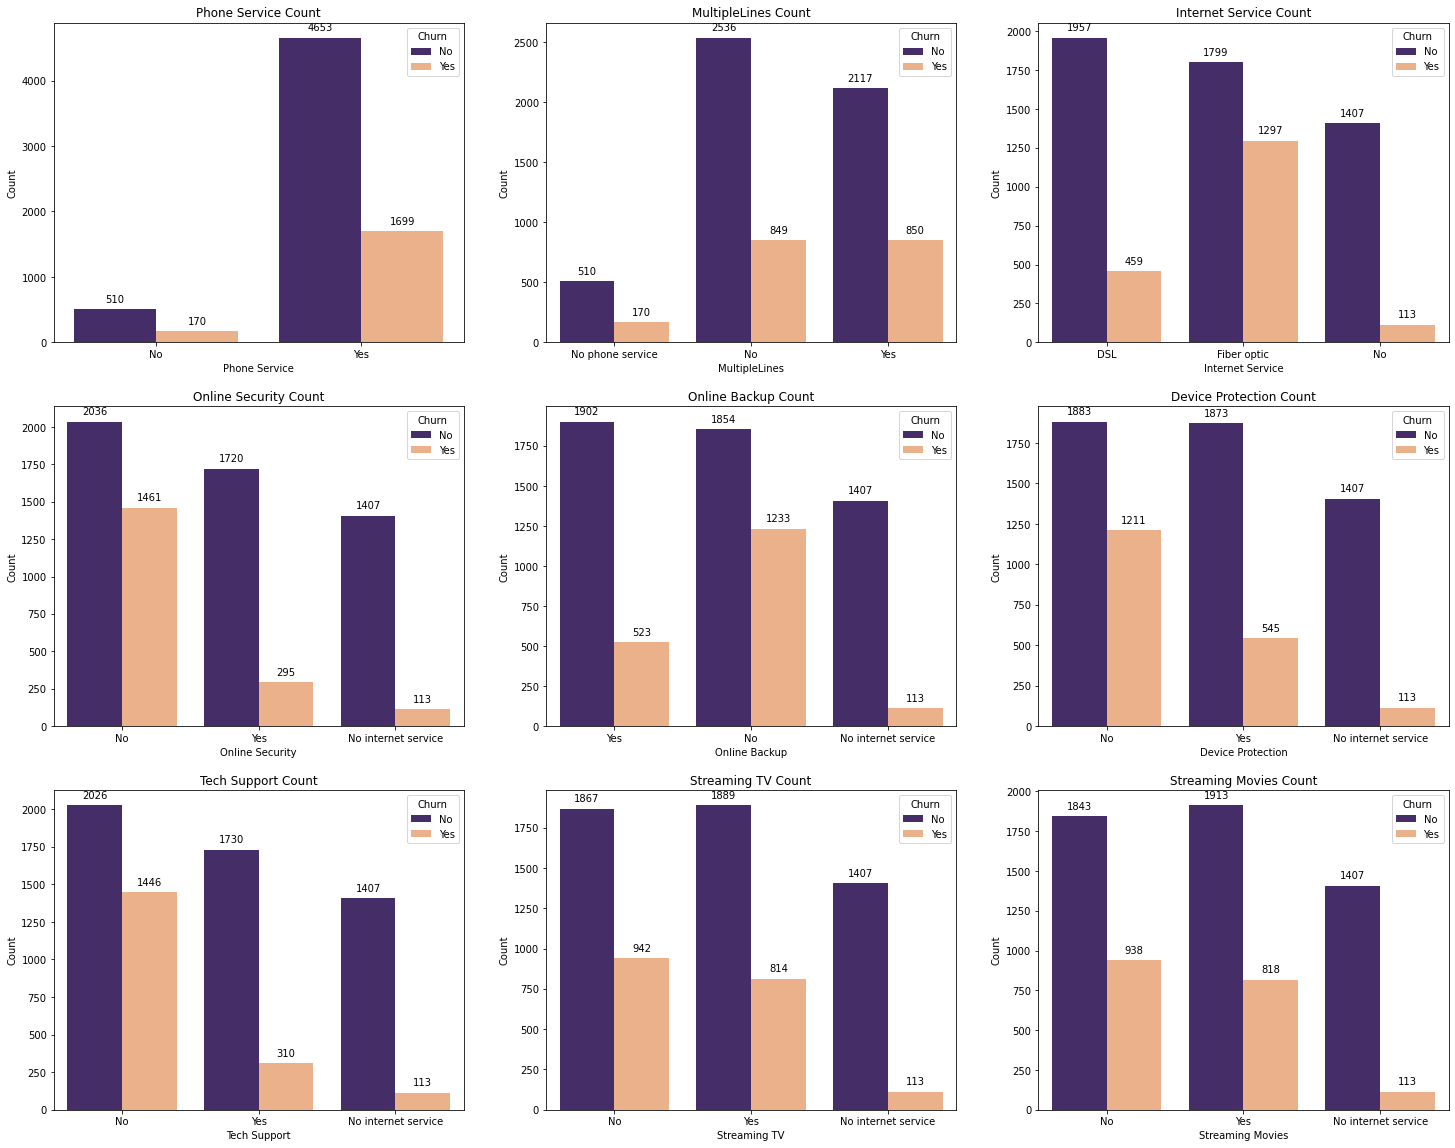

In [15]:
plt.figure(figsize=(25, 20))

plt.subplot(3, 3, 1)
fig = sns.countplot(x='PhoneService', data=data, hue='Churn',palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Phone Service Count')
plt.xlabel('Phone Service')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
fig = sns.countplot(x='MultipleLines', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('MultipleLines Count')
plt.xlabel('MultipleLines')
plt.ylabel('Count')

plt.subplot(3, 3, 3)
fig = sns.countplot(x='InternetService', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Internet Service Count')
plt.xlabel('Internet Service')
plt.ylabel('Count')

plt.subplot(3, 3, 4)
fig = sns.countplot(x='OnlineSecurity', data=data, hue='Churn',palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Online Security Count')
plt.xlabel('Online Security')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
fig = sns.countplot(x='OnlineBackup', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Online Backup Count')
plt.xlabel('Online Backup')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
fig = sns.countplot(x='DeviceProtection', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Device Protection Count')
plt.xlabel('Device Protection')
plt.ylabel('Count')

plt.subplot(3, 3, 7)
fig = sns.countplot(x='TechSupport', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Tech Support Count')
plt.xlabel('Tech Support')
plt.ylabel('Count')

plt.subplot(3, 3, 8)
fig = sns.countplot(x='StreamingTV', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Streaming TV Count')
plt.xlabel('Streaming TV')
plt.ylabel('Count')

plt.subplot(3, 3, 9)
fig = sns.countplot(x='StreamingMovies', data=data, hue='Churn', palette=['#432371','#FAAE7B'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Streaming Movies Count')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')

plt.show()

Insight yang didapat adalah
- Phone service memiliki presentase churn rate 1:3 baik yang mempunyai layanan telpon ataupun tidak.
- Multiple line adalah pertanyaan sambungan dari phone service memiliki presentase churn yang sama 1:3
- Fiber optic memiliki presentase churn rate yang tinggi dibandingkan internet service yang lain 
- Jika customer tidak punya layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) mereka cenderung Churn
- Streaming TV dan Streaming movies memiliki presentase churn rate yang sama 1:2 baik yang mempunyai layanannya maupun tidak

Disini saya dapat menyimpulkan bahwa layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) sangat penting terhadap churn rate, oleh karena itu saya sarankan kepada provider dapat memberikan layanan tersebut dengan harga yang lebih murah agar customer tidak churn

### Account Information:

 tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

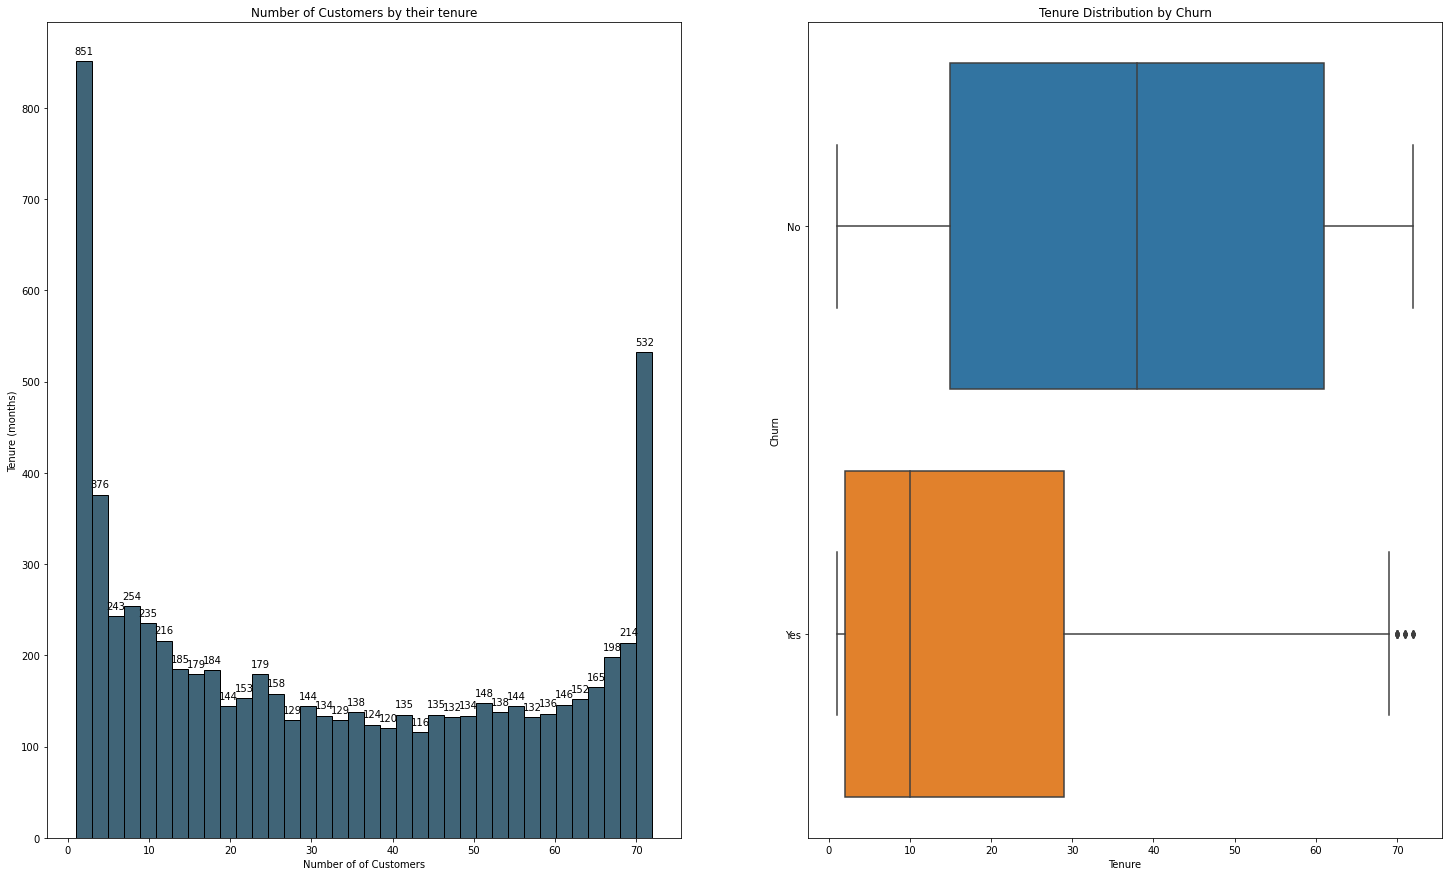

In [16]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
fig = sns.histplot(data['tenure'],bins=int(180/5), color = '#003049',)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of Customers by their tenure')
plt.xlabel('Number of of Customers')
plt.ylabel('Tenure (months)')


plt.subplot(1, 2, 2)
sns.boxplot(x='tenure', y='Churn', data=data)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

Insight yang didapat adalah
- customer yang hanya berlangganan sebulan cendurung churn karena mereka mungkin hanya ingin mencoba layanan apakah worth it atau tidak.
- customer yang yang berlangganan dari bulan 10 sampai 60 atau lebih cenderung tidak churn karena mereka adalah pelanggan tetap

### Tenure vs Contract

Text(0.5, 1.0, 'Two Year Contract')

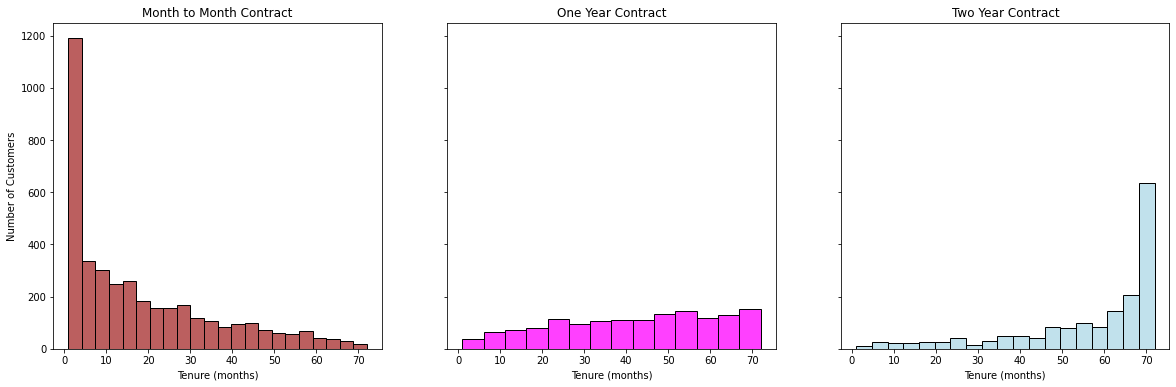

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.histplot(data[data['Contract']=='Month-to-month']['tenure'],ax=ax1,color ='brown')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.histplot(data[data['Contract']=='One year']['tenure'],ax=ax2,color ='magenta')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.histplot(data[data['Contract']=='Two year']['tenure'],ax=ax3,color ='lightblue')

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Insight yang didapat adalah
- customer banyak memakai Month to month contract daripada one atau two year contract.
- karena one atau two year contract hanyalah untuk customer tetap yang puas terhadap jasa provider tersebut.


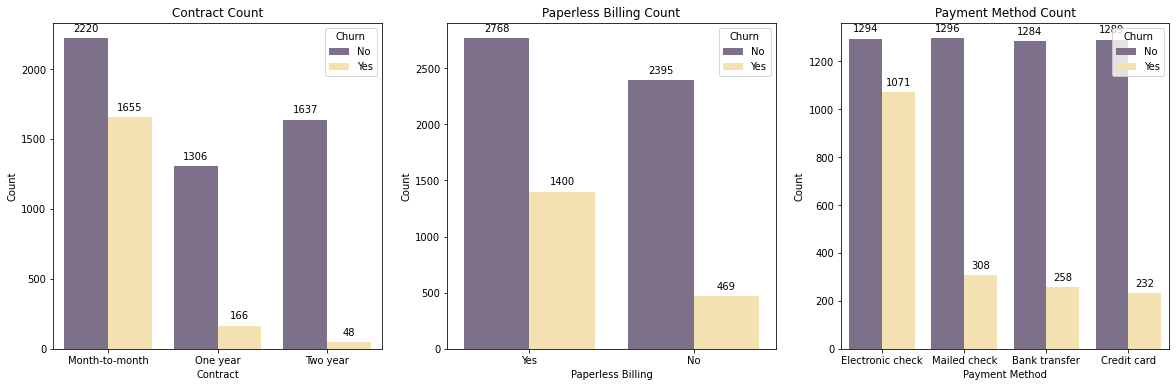

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Contract', data=data, hue='Churn',palette=['#7B6D8D','#FFE6A7'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Contract Count')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
fig = sns.countplot(x='PaperlessBilling', data=data, hue='Churn',palette=['#7B6D8D','#FFE6A7'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Paperless Billing Count')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
fig = sns.countplot(x='PaymentMethod', data=data, hue='Churn',palette=['#7B6D8D','#FFE6A7'])
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Payment Method Count')
plt.xlabel('Payment Method')
fig.set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'])
plt.ylabel('Count')
plt.show()

Insight yang didapat adalah
- Customer yang mempunyai kontrak month to month cenderung churn karena mereka baru mencoba apakah layanan ini bagus atau tidak
- Customer yang memakai paperless billing cenderung churn 
- Customer yang memakai payment method electronic check cenderung churn


### Monthly Charges vs Total Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

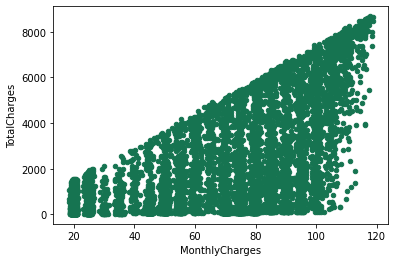

In [19]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',  y='TotalCharges',color='#167451')

In [20]:
print(f'Monthly Charges Mean: {data.MonthlyCharges.mean():.2f}')
print(f'Total Charges Mean: {data.TotalCharges.mean():.2f}')

Monthly Charges Mean: 64.80
Total Charges Mean: 2283.30


Insight yang didapat adalah 
- Dapat dilihat dari scatter plot bahwa kolom MonthlyCharges memiliki korelasi yang positive terhadap kolom TotalCharges.
- Rata rata customer memiliki tagihan 64.80 dollar tiap bulannya.
- Total rata rata customer memiliki tagihan 2283.30 dollar.

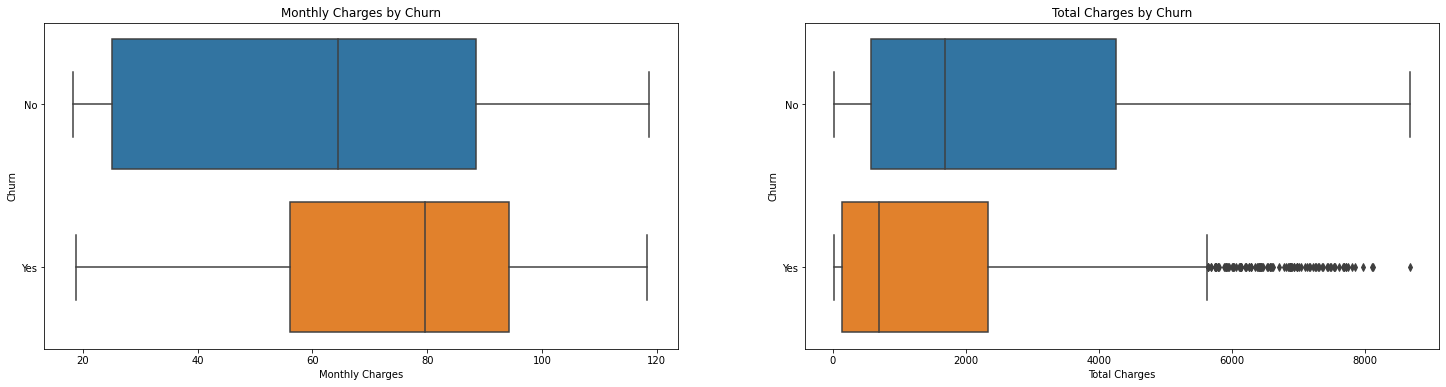

In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MonthlyCharges', y='Churn',data=data)
plt.title(f'Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.subplot(1, 2, 2)
sns.boxplot(x='TotalCharges', y='Churn',data=data)
plt.title(f'Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.show()

In [22]:
print('------------------------------------------------------')
print(f"Monthly Charges for Non-Churn Customer: {data.MonthlyCharges[data.Churn == 'No'].mean():.2f}")
print(f"Monthly Charges for Churn Customer: {data.MonthlyCharges[data.Churn == 'Yes'].mean():.2f}")
print('------------------------------------------------------')
print(f"Total Charges for Non-Churn Customer: {data.TotalCharges[data.Churn == 'No'].mean():.2f}")
print(f"Total Charges for Churn Customer: {data.TotalCharges[data.Churn == 'Yes'].mean():.2f}")

------------------------------------------------------
Monthly Charges for Non-Churn Customer: 61.31
Monthly Charges for Churn Customer: 74.44
------------------------------------------------------
Total Charges for Non-Churn Customer: 2555.34
Total Charges for Churn Customer: 1531.80


Insight yang didapat adalah 
- Dari grafik boxplot MonthlyCharge  Customer dengan range monthly charge 58 - 95 adalah churn dan Customer dengan range monthly charge 26 - 87 adalah tidak churn

bisa disimpulkan bahwa orang churn rata rata karena tagihan perbulan yang mahal, membuat mereka meninggalkan perusahan (churn)

- Dari grafik boxplot TotalCharge bisa dilihat dari outlier yang churn dari range ~5800 sampai 8684.80 customer meninggalkan perusahaan (churn)

bisa disimpulkan bahwa customer yang sudah mengeluarkan uang lebih dari 5800 dollar terhadap layanan service perusahan mereka akan meninggalkan perusahaan (churn)


## Data Preprocessing

### Feature Engineering

Setelah melakukan EDA kita mengetahui bahwa customerID hanyalah untuk mengidentifikasikan customer dan tidaklah penting untuk proses modelling nanti. oleh karena itu saya akan menghapus column customerID

In [23]:
data.drop(columns=['customerID'], inplace=True, axis=1)

Mengubah tipe data pada kolom `Churn`, dimana:
- **Yes** akan menjadi **1**
- **No** akan mnejadi **0**

In [24]:
data.Churn = data.Churn.map({'Yes': 1, 'No': 0})

### Split Data

Pada bagian ini akan dilakukan splitting data yang akan menjadi training set, validation set, dan testing set dimana pembagiannya menjadi data train_val dan data test di split dulu 90 : 10 lalu Data train_val displit menjadi Data train dan data validation 80 : 20

Data test akan dijadikan inference untuk prediksi model

In [25]:
#split 90 : 10 
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=31, stratify=data.Churn)

#split 80 : 20
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=31, stratify=df_train_val.Churn)

### Handling Missing Value

cek missing value

In [26]:
#Checking Missing Value
df_train_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

tidak ada missing value di dalam dataset

### Handling Outliers

#### Cek Distribusi Data

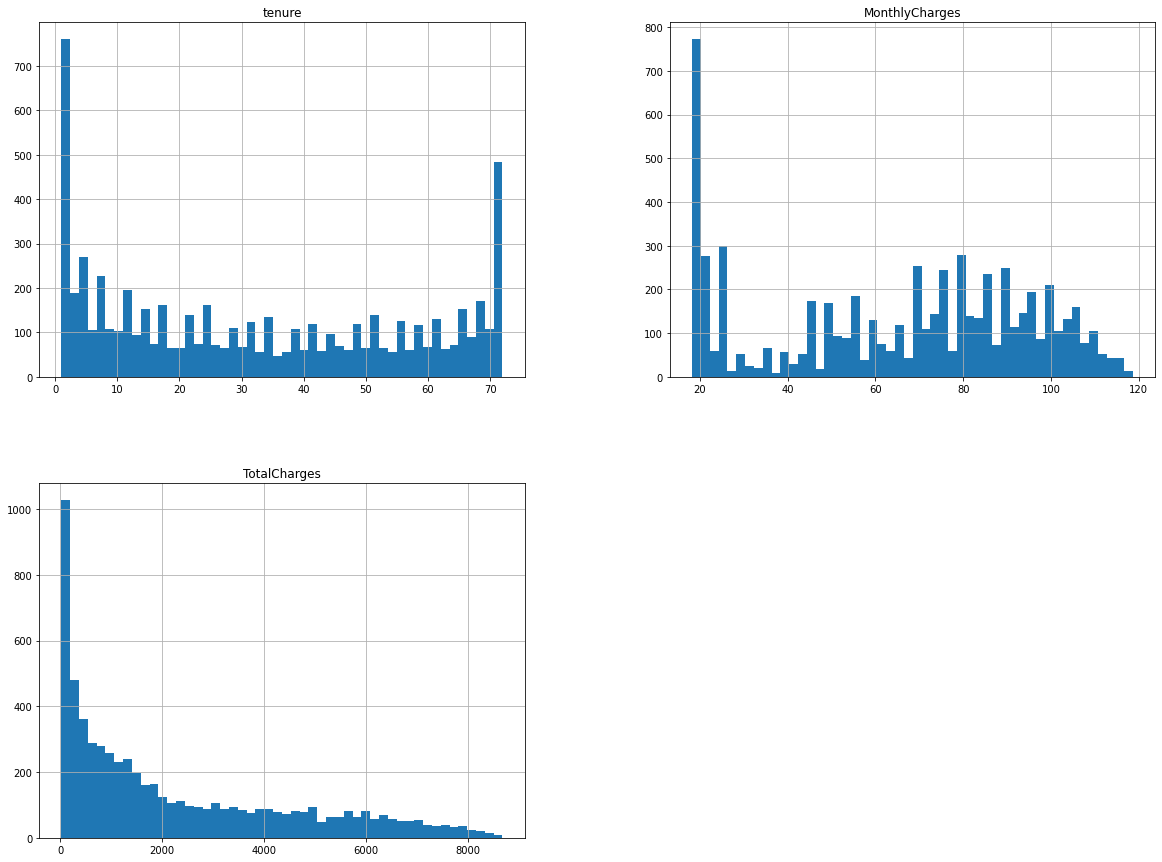

In [27]:
#cek distribution
df_train_val[['tenure','MonthlyCharges','TotalCharges']].hist(bins=50, figsize=(20, 15))
plt.show()

In [28]:
# Looping to check the Distribution of each column
dist_check = df_train_val[['tenure','MonthlyCharges','TotalCharges']].skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [29]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['TotalCharges']

Normal distribution : ['tenure', 'MonthlyCharges']


In [30]:
#Buat Function untuk Cek outlier Normal Distributin dan Skew
def detect_normal(df, variable):
    
    threshold = 1.5
    mean_ = np.mean(df[variable])
    std_ = np.std(df[variable])

    upper_count = df[
                    ((df[variable]-mean_)/std_) > threshold
                    ][variable].count()

    bottom_count = df[
                    ((df[variable]-mean_)/std_) < -threshold
                    ][variable].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[variable])*100)

    a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        text = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(text)   

In [31]:
#Cek outlier di distribusi normal
print('train')
for x in normal_dist:
    detect_normal(df_train, variable=x)
print('validation')
for y in normal_dist:
    detect_normal(df_val, variable=y)

train
{'Variable': 'tenure', 'Total Outliers': 461, 'Percentage': 9.107072303437375}
{'Variable': 'MonthlyCharges', 'Total Outliers': 597, 'Percentage': 11.793757408139076}
validation
{'Variable': 'tenure', 'Total Outliers': 106, 'Percentage': 8.372827804107425}
{'Variable': 'MonthlyCharges', 'Total Outliers': 171, 'Percentage': 13.507109004739338}


In [32]:
#Cek outlier di skew
print('train')
for i in skew_dist:
    detect_skew(df_train, variable=i, distance=1.5)
print('validation')
for j in skew_dist:
    detect_skew(df_val, variable=j, distance=1.5)

train
{'Variable': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}
validation
{'Variable': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}


### Censoring

In [33]:
#Censoring normal distribution with gaussian capping method
windsoriser = Winsorizer(capping_method='gaussian', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=1.5, 
                          variables=['tenure', 'MonthlyCharges'])

windsoriser.fit(df_train)
windsoriser.fit(df_val)

df_train_cen = windsoriser.transform(df_train)
df_val_cen = windsoriser.transform(df_val)

#### Feature Selection

In [34]:
# Training 
X_train = df_train_cen.drop(['Churn'], axis=1) # Features
y_train = df_train_cen['Churn'] # Target

# Validation
X_val = df_val_cen.drop(['Churn'], axis=1) # Features
y_val = df_val_cen['Churn'] # Target

#### Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan scaling dan encoding, dimana:
- **Scaling** menggunakan `StandardScaler()`
- **Encoding** menggunakan `OneHotEncoder()`

alasan menggunakan onehotencoder adalah karena onehotencoder memiliki akurasi yang lebih bagus dari encoder lainnya ketika jumlah label tidak terlalu banyak 

sumber 
https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b

In [35]:
num_pipe = Pipeline([('scaler', StandardScaler())])

cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

Setelah pipeline dibuat, selanjutkan akan dilakukan scaling dan encoding terhadap `X_train` dan `X_val`.

In [36]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [46]:
X_train

array([[-0.2590246 ,  1.20674295,  0.1473109 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.12397806, -0.30011212, -0.8904118 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5647406 , -1.34176361, -0.48861553, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.81187016, -0.52428631,  0.12542394, ...,  0.        ,
         1.        ,  0.        ],
       [-1.20635458, -1.00803061, -0.96198504, ...,  1.        ,
         0.        ,  0.        ],
       [-1.2887311 , -0.52765735, -0.99094453, ...,  0.        ,
         0.        ,  1.        ]])

Cek shape

In [37]:
#Cek shape
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (5062, 46)
X_val shape: (1266, 46)


### Input Pipeline

In [38]:
# Training
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(31)

# Validation
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(31)

## Model Definition

untuk model awal saya menggunakan 
- Optimizer = Adam 
- Epoch = 100

Adam Optimizer

In [39]:
optim_adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
)

### Sequential API

In [40]:
#Defining the model
model_seq = keras.models.Sequential([
    keras.layers.Dense(32,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

### Functional API

In [41]:
#Defining the model
input_ = keras.layers.Input(shape=(X_train.shape[1],))
hidden1 = keras.layers.Dense(32, activation="relu")(input_)
hidden2 = keras.layers.Dense(16, activation="relu")(hidden1)
output_ = keras.layers.Dense(1, activation="sigmoid")(hidden2)
model_func = keras.models.Model(inputs=input_, outputs=output_)

## Model Training

In [42]:
#Compile model
model_seq.compile(loss="binary_crossentropy", optimizer=optim_adam, metrics='accuracy')

#Training model
history_seq = model_seq.fit(train_data, epochs=100, validation_data=val_data,verbose=0)

model_seq.summary()

KeyboardInterrupt: 

In [ ]:
#Compile model
model_func.compile(loss="binary_crossentropy", optimizer=optim_adam, metrics='accuracy')

#Training model
history_func = model_func.fit(train_data, epochs=100, validation_data=val_data, verbose=0)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                1504      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


## Model Evaluation

### Sequential API

In [ ]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.308890,0.862307,0.579305,0.764613
96,0.307711,0.863295,0.580769,0.763033
97,0.307515,0.863493,0.592543,0.760664
98,0.306758,0.865073,0.586848,0.763033
99,0.306430,0.863493,0.593730,0.759874


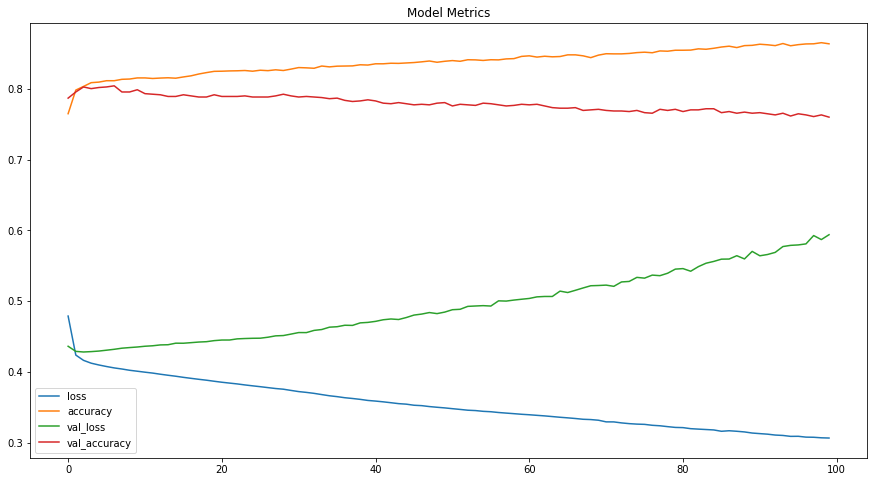

In [ ]:
#model metrics
metrics_seq.plot(figsize=(15, 8))
plt.title('Model Metrics')
plt.show()

In [ ]:
#predict train and val data for classification report and confusion matrix
y_pred_train_seq = model_seq.predict(X_train)
y_pred_train_seq = y_pred_train_seq.round()

y_pred_val_seq = model_seq.predict(X_val)
y_pred_val_seq = y_pred_val_seq.round()

40/40 [==============================] - 0s 487us/step


In [ ]:
#classification_report
print('----------------------Training Set------------------------')
print(classification_report(y_train, y_pred_train_seq))
print('---------------------Validation Set----------------------')
print(classification_report(y_val, y_pred_val_seq))

----------------------Training Set------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3717
           1       0.76      0.69      0.72      1345

    accuracy                           0.86      5062
   macro avg       0.83      0.81      0.81      5062
weighted avg       0.86      0.86      0.86      5062

---------------------Validation Set----------------------
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       929
           1       0.55      0.53      0.54       337

    accuracy                           0.76      1266
   macro avg       0.69      0.69      0.69      1266
weighted avg       0.76      0.76      0.76      1266



Text(33.0, 0.5, 'Actual')

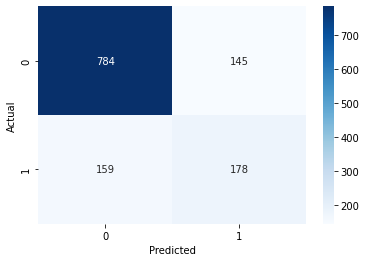

In [ ]:
#Visualising the prediction for the validation test
cm = math.confusion_matrix(labels=y_val,predictions=y_pred_val_seq)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Model Sequential API menghasilkan akurasi yang cukup baik yaitu **0.86** pada training set dan **0.76** pada validation set. 

Namun, recall dari model ini rendah dalam memprediksi kelas 1, hal ini disebabkan karena adanya label imbalance pada dataset. 

Grafik metric dapat diketahui model mengalami **overfitting** ini ditandai saat training loss dari model turun tetapi validation lossnya naik. 

### Functional API 

In [ ]:
metrics_func = pd.DataFrame(history_func.history)
metrics_func.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.322702,0.847491,0.549358,0.780411
96,0.322083,0.846898,0.551627,0.781201
97,0.321576,0.847491,0.552874,0.781991
98,0.320871,0.845713,0.555364,0.781991
99,0.320323,0.846306,0.554808,0.778831


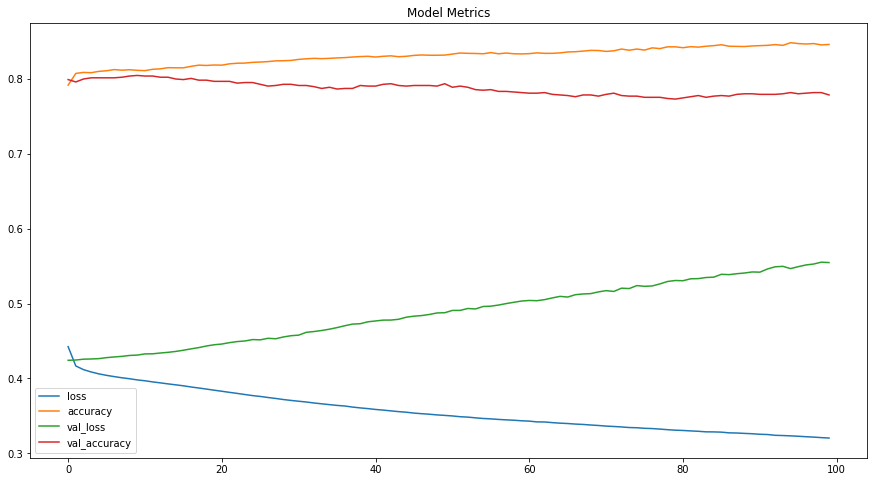

In [ ]:
metrics_func.plot(figsize=(15, 8))
plt.title('Model Metrics')
plt.show()

In [ ]:
#predict train and val data for classification report and confusion matrix
y_pred_train_func = model_func.predict(X_train)
y_pred_train_func = y_pred_train_func.round()

y_pred_val_func = model_func.predict(X_val)
y_pred_val_func = y_pred_val_func.round()

40/40 [==============================] - 0s 538us/step


In [ ]:
print('----------------------Training Set------------------------')
print(classification_report(y_train, y_pred_train_func))
print('---------------------Validation Set----------------------')
print(classification_report(y_val, y_pred_val_func))

----------------------Training Set------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3717
           1       0.76      0.65      0.70      1345

    accuracy                           0.85      5062
   macro avg       0.82      0.79      0.80      5062
weighted avg       0.85      0.85      0.85      5062

---------------------Validation Set----------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       929
           1       0.60      0.51      0.55       337

    accuracy                           0.78      1266
   macro avg       0.72      0.69      0.70      1266
weighted avg       0.77      0.78      0.77      1266



Text(33.0, 0.5, 'Actual')

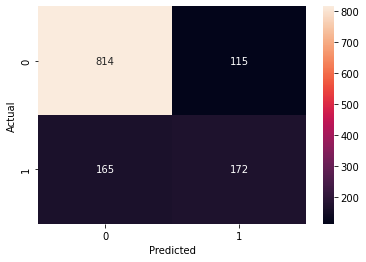

In [ ]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_val,predictions=y_pred_val_func)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Model Sequential API menghasilkan akurasi yang cukup baik yaitu **0.85** pada training set dan **0.78** pada validation set. 

Namun, recall dari model ini rendah dalam memprediksi kelas 1, hal ini disebabkan karena adanya label imbalance pada dataset. 

Grafik metric dapat diketahui model mengalami **overfitting** ini ditandai saat training loss dari model turun tetapi validation lossnya naik. 

### Conclusion

Untuk Model Improvement saya akan menggunakan Model Sequential API karena walupun akurasi dari kedua model hampir sama persis, tapi Sequential API mempunyai Recall terhadap label 1 yang lebih bagus sedikit dibandingkan Functional API

dilihat dari Confusion Matrix nya 

- True Positive = Not Churn
- True Negative = Churn

Sequential API berhasil memprediksi True Negative sebanyak 178

dan Functional API berhasil memprediksi True Negative sebanyak 172


## Model Improvement	

untuk model improvement saya mencoba tweaking menggunakan 

- Optimizer = Nadam karena Nadam merupakan extension dari Adam dan ada Nesterov nya

- Epoch = 200 karena 2 kali lebih banyak dari base model

- Kernel Regulizer = l2  (Least absolute deviations(l1) and Least square errors(l2)) alasan saya memakai l2 karena l2 loss lebih barik dari l1 loss

- Kernel Initializer = Glorot uniform alasannya adalah karena untuk mempertahankan smooth distribution  yang sama baik untuk forward pass maupun back propagation

- Drop out 0.3 (untuk menghindari overfitting)

Nadam Optimizer

In [ ]:
optim_nadam = tf.keras.optimizers.Nadam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-07, 
    name="Nadam",
)


### Sequential Improvement

In [ ]:
#Defining the model
model_seq_improve = keras.models.Sequential([
    keras.layers.Dense(64,input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu",kernel_initializer='GlorotUniform', kernel_regularizer='l2'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation="relu", kernel_initializer='GlorotUniform',kernel_regularizer='l2'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid",kernel_initializer='GlorotUniform', kernel_regularizer='l2')
])
model_seq_improve.compile(loss="binary_crossentropy", optimizer=optim_nadam, metrics='accuracy')

In [ ]:
#Training the model
history_seq_improve = model_seq_improve.fit(train_data, epochs=200,validation_data=val_data,verbose=0)

model_seq_improve.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                3008      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-traina

In [ ]:
metrics_seq_improve = pd.DataFrame(history_seq_improve.history)
metrics_seq_improve.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.434498,0.799091,0.435471,0.792259
196,0.430446,0.801067,0.435631,0.791469
197,0.432421,0.805018,0.435210,0.793049
198,0.433422,0.801659,0.434820,0.793839
199,0.435570,0.801659,0.435196,0.791469


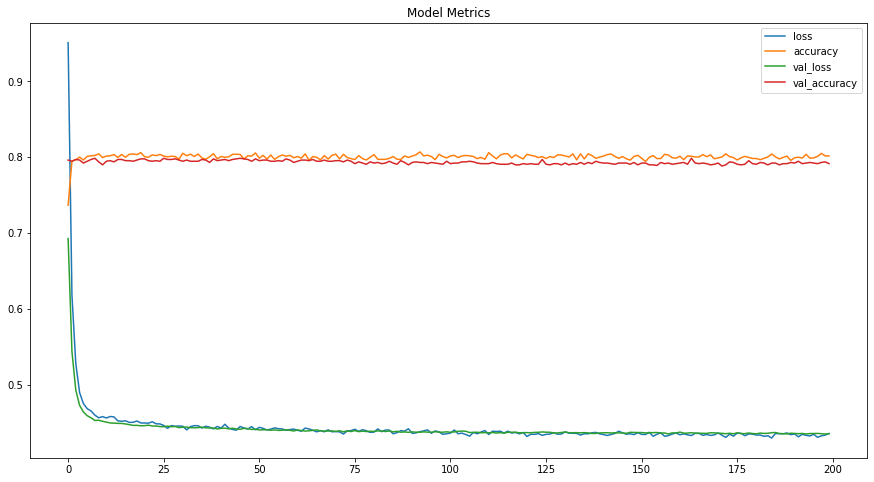

In [ ]:
metrics_seq_improve.plot(figsize=(15, 8))
plt.title('Model Metrics')
plt.show()

In [ ]:
print('----------------------Training Set------------------------')
print(classification_report(y_train, model_seq_improve.predict(X_train).round()))
print('---------------------Validation Set----------------------')
print(classification_report(y_val, model_seq_improve.predict(X_val).round()))

----------------------Training Set------------------------
159/159 [==============================] - 0s 563us/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3717
           1       0.65      0.57      0.61      1345

    accuracy                           0.81      5062
   macro avg       0.75      0.73      0.74      5062
weighted avg       0.80      0.81      0.80      5062

---------------------Validation Set----------------------
40/40 [==============================] - 0s 564us/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       929
           1       0.62      0.55      0.58       337

    accuracy                           0.79      1266
   macro avg       0.73      0.72      0.72      1266
weighted avg       0.78      0.79      0.79      1266



40/40 [==============================] - 0s 590us/step


Text(33.0, 0.5, 'Actual')

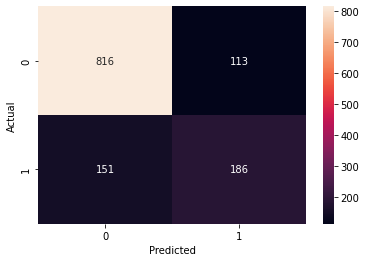

In [ ]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_val,predictions=model_seq_improve.predict(X_val).round())

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Dari confusion matrix diatas

Model Improvement mengalami peningkatan yaitu 

- Sequential API berhasil memprediksi True Positive sebanyak 784 
- Sequential API Improve model berhasil memprediksi True Positive sebanyak 816

Sequential API Improve model berhasil memperbaiki True Positive sebanyak 32 

- Sequential API berhasil memprediksi True Negative sebanyak 178 
- Sequential API Improve model berhasil memprediksi True Negative sebanyak 186

Sequential API Improve model berhasil memperbaiki True Negative sebanyak 8 


## Model Analysis

Setelah dilakukan peningkatan terhadap model dengan mengubah optimizer menjadi **nadam**, menambahkan **2 regularisasi Dropout** dengan **rate = 0.3**, menambahkan **1 hidden layer** dengan **64 neuron**, dan menambahkan epoch pada training model menjadi 200 epoch, model **tidak lagi mengalami overfitting** dan sudah menjadi model good fit

Secara keseluruhan model sudah baik dan menghasilkan akurasi sebasar **0.81** pada training set dan **0.79** pada validation set.

## Model Saving

In [ ]:
# Save the model
model_seq_improve.save('model')

# Save preprocessing pipeline
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

INFO:tensorflow:Assets written to: model\assets


## Model Inference

Setelah model dilatih dan dievaluasi, sekarang model akan diuji menggunakan test set (inference).

In [ ]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4481,Male,No,Yes,No,42,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),40.15,1626.05,0
2679,Male,No,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.65,301.40,1
5614,Male,No,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),85.50,5696.60,0
646,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,1
5837,Female,No,No,No,2,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,51.40,96.80,0


In [44]:
X_test

NameError: name 'X_test' is not defined

In [ ]:
# Split features and target
X_test = df_test.drop(['Churn'], axis=1) # Features
y_test = df_test['Churn'] # Target


# Transform the test set
X_test = preprocessor.transform(X_test)

# Predict the test set
y_pred = model_seq_improve.predict(X_test).round()

# Create dataframe
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten().astype(int)})
predictions.head(20)

22/22 [==============================] - 0s 714us/step


,Actual,Predicted
4481,0,0
2679,1,1
5614,0,0
646,1,0
5837,0,1
6506,1,1
1272,0,0
1188,0,0
2199,0,0
6282,0,0


dengan inference 20 data 

- Label 0 atau Not Churn berhasil memprediksi 12/14 akurasi 85 %
- Label 1 atau Churn berhasil memprediksi 4/6 akurasi 66 %

In [ ]:
# Create a test dataset pipeline
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(31)

# Evaluate test set
results = model_seq_improve.evaluate(test_data)
print(f'Test Set - Loss     : {results[0]:.2f}')
print(f'Test Set - Accuracy : {results[1]:.2f}')

23/23 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8026
Test Set - Loss     : 0.43
Test Set - Accuracy : 0.80


## Conclusion EDA Analysis & Model Analysis

## EDA

Insight yang didapat adalah 73,4% atau 5163 customer tidak churn dan 26,6 persen dari total customer adalah churn (meninggalkan perusahaan)

saya sebagai data analis akan menganalisis apa saja faktor yang membuat customer meninggalkan perusahaan atau Churn dimulai dari demographic information

- presentase churn antara laki dan perempuan sama 
- senior citizen memiliki presentase churn rate yang tinggi dapat dikatakan bahwa senior citizen cenderun churn
- customer yang tidak memiliki partner memiliki partner memliki presentase chrun yang lebih besar daripada yang memiliki partner
- customer yang memiliki dependets cenderung tidak churn 


- Phone service memiliki presentase churn rate 1:3 baik yang mempunyai layanan telpon ataupun tidak.
- Multiple line adalah pertanyaan sambungan dari phone service memiliki presentase churn yang sama 1:3
- Fiber optic memiliki presentase churn rate yang tinggi dibandingkan internet service yang lain 
- Jika customer tidak punya layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) mereka cenderung Churn
- Streaming TV dan Streaming movies memiliki presentase churn rate yang sama 1:2 baik yang mempunyai layanannya maupun tidak

Disini saya dapat menyimpulkan bahwa layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) sangat penting terhadap churn rate, oleh karena itu saya sarankan 
kepada provider dapat memberikan layanan tersebut dengan harga yang lebih murah agar customer tidak churn


- Phone service memiliki presentase churn rate 1:3 baik yang mempunyai layanan telpon ataupun tidak.
- Multiple line adalah pertanyaan sambungan dari phone service memiliki presentase churn yang sama 1:3
- Fiber optic memiliki presentase churn rate yang tinggi dibandingkan internet service yang lain 
- Jika customer tidak punya layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) mereka cenderung Churn
- Streaming TV dan Streaming movies memiliki presentase churn rate yang sama 1:2 baik yang mempunyai layanannya maupun tidak

Disini saya dapat menyimpulkan bahwa layanan keamanan seperti (Online Security, Online Backup, Device Protection, Tech Support) sangat penting terhadap churn rate, oleh karena itu saya sarankan kepada provider dapat memberikan layanan 
tersebut dengan harga yang lebih murah agar customer tidak churn

- customer yang hanya berlangganan sebulan cendurung churn karena mereka mungkin hanya ingin mencoba layanan apakah worth it atau tidak.
- customer yang yang berlangganan dari bulan 10 sampai 60 atau lebih cenderung tidak churn karena mereka adalah pelanggan tetap

- customer banyak memakai Month to month contract daripada one atau two year contract.
- karena one atau two year contract hanyalah untuk customer tetap yang puas terhadap jasa provider tersebut.

- Customer yang mempunyai kontrak month to month cenderung churn karena mereka baru mencoba apakah layanan ini bagus atau tidak
- Customer yang memakai paperless billing cenderung churn 
- Customer yang memakai payment method electronic check cenderung churn

- Dapat dilihat dari scatter plot bahwa kolom MonthlyCharges memiliki korelasi yang positive terhadap kolom TotalCharges.
- Rata rata customer memiliki tagihan 64.80 dollar tiap bulannya.
- Total rata rata customer memiliki tagihan 2283.30 dollar.

- Dari grafik boxplot MonthlyCharge  Customer dengan range monthly charge 58 - 95 adalah churn dan Customer dengan range monthly charge 26 - 87 adalah tidak churn

bisa disimpulkan bahwa orang churn rata rata karena tagihan perbulan yang mahal, membuat mereka meninggalkan perusahan (churn)

- Dari grafik boxplot TotalCharge bisa dilihat dari outlier yang churn dari range ~5800 sampai 8684.80 customer meninggalkan perusahaan (churn)

bisa disimpulkan bahwa customer yang sudah mengeluarkan uang lebih dari 5800 dollar terhadap layanan service perusahan mereka akan meninggalkan perusahaan (churn)

## Model Analysis Improvement

Dari Grafik confusion matrix

Model Improvement mengalami peningkatan yaitu 

- Sequential API berhasil memprediksi True Positive sebanyak 784 
- Sequential API Improve model berhasil memprediksi True Positive sebanyak 816

Sequential API Improve model berhasil memperbaiki True Positive sebanyak 32 

- Sequential API berhasil memprediksi True Negative sebanyak 178 
- Sequential API Improve model berhasil memprediksi True Negative sebanyak 186

Sequential API Improve model berhasil memperbaiki True Negative sebanyak 8 

### Inference

dengan inference 20 data 

- Label 0 atau Not Churn berhasil memprediksi 12/14 akurasi 85 %
- Label 1 atau Churn berhasil memprediksi 4/6 akurasi 66 %

Test Set - Loss     : 0.43

Test Set - Accuracy : 0.80